In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('houses.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Remove obvious columns not needed
df = df.drop(['id', 'zipcode', 'lat', 'long'], axis=1)

In [5]:
# Convert date to DateTime -object
df['DateTime'] = pd.to_datetime(df['date'])

In [6]:
# Get year and month as intergers
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month

In [7]:
# Drop original timestamp and temporary
df = df.drop(['DateTime', 'date'], axis=1)

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,2015,2


In [9]:
# Check values count
df.corr(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447,0.003576,-0.010081
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244,-0.009838,-0.001533
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175,-0.026596,0.007392
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286,-0.029038,0.011810
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557,0.005468,-0.002369
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269,-0.022315,0.014005
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703,-0.004165,0.008132
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575,0.001364,-0.005638
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.092824,-0.003406,-0.045589,0.021978
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248,-0.030387,0.008376


In [10]:
# It seems that data is not balanced when it comes to year, most sales are from 2014
df['year'].value_counts()

year
2014    14633
2015     6980
Name: count, dtype: int64

In [11]:
# Check which are in squere feet
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'year', 'month'],
      dtype='object')

In [12]:
# Create new column for measurement in m2
df['living_m2'] = df['sqft_living'] * 0.09290304
df['lot_m2'] = df['sqft_lot'] * 0.09290304
df['above_m2'] = df['sqft_above'] * 0.09290304
df['basement_m2'] = df['sqft_basement'] * 0.09290304
df['living_m2_15'] = df['sqft_living15'] * 0.09290304
df['lot_m2_15'] = df['sqft_lot15'] * 0.09290304

In [13]:
# Drop original squere feet columns
df = df.drop(["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"], axis=1)

In [14]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,year,month,living_m2,lot_m2,above_m2,basement_m2,living_m2_15,lot_m2_15
0,221900.0,3,1.00,1.0,0,0,3,7,1955,0,2014,10,109.625587,524.902176,109.625587,0.000000,124.490074,524.902176
1,538000.0,3,2.25,2.0,0,0,3,7,1951,1991,2014,12,238.760813,672.803816,201.599597,37.161216,157.006138,709.686323
2,180000.0,2,1.00,1.0,0,0,3,6,1933,0,2015,2,71.535341,929.030400,71.535341,0.000000,252.696269,748.984308
3,604000.0,4,3.00,1.0,0,0,5,7,1965,0,2014,12,182.089958,464.515200,97.548192,84.541766,126.348134,464.515200
4,510000.0,3,2.00,1.0,0,0,3,8,1987,0,2015,2,156.077107,750.656563,156.077107,0.000000,167.225472,697.051509


In [15]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [16]:
# yr_renovated is tricky
# most of it 0 => probably never renovated, or data not available

# options:
# drop yr_renovated
# if yr_renovated is 0 => replace yr_renovated 
df = df.drop(["yr_renovated"], axis=1)

In [17]:
import dtale
dtale.show(df).open_browser()

<Axes: >

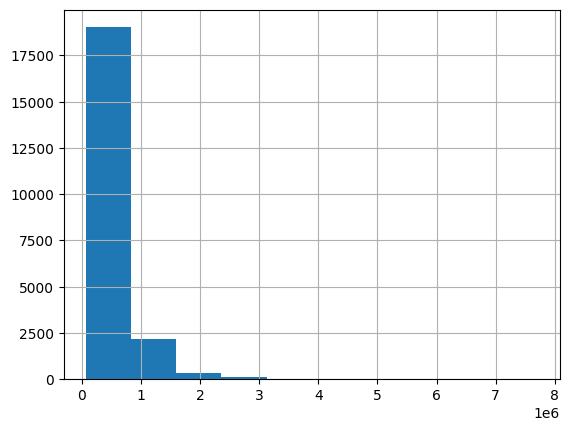

In [18]:
# Check price distribution
df['price'].hist()

In [19]:
# Quick and dirty way to remove all extreme values (outliers)
# Uses normal distribution, all values under -3 and +3 are removed
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

<Axes: >

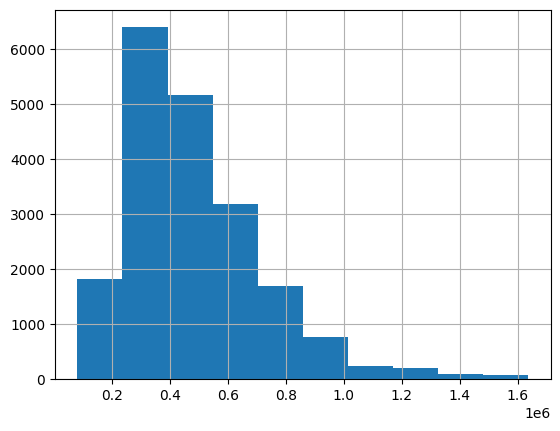

In [20]:
# Check distribution again
df['price'].hist()

In [21]:
# Seems we have lots of outliers, normal distribution lost 2000 apartments from data
df.describe()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,year,month,living_m2,lot_m2,above_m2,basement_m2,living_m2_15,lot_m2_15
count,1.962800e+04,19628.000000,19628.000000,19628.000000,19628.0,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000
mean,4.842113e+05,3.322753,2.041077,1.480793,0.0,0.095272,3.412421,7.531333,1970.700428,2014.323314,6.575301,181.310203,924.477966,157.425318,23.884885,176.906013,852.366776
std,2.345685e+05,0.850175,0.690269,0.537803,0.0,0.408415,0.643305,1.022838,29.391379,0.467753,3.115887,68.625652,1085.094962,65.534000,36.107475,55.460278,849.533870
min,8.200000e+04,1.000000,0.000000,1.000000,0.0,0.000000,2.000000,5.000000,1900.000000,2014.000000,1.000000,34.374125,48.309581,34.374125,0.000000,42.735398,60.479879
25%,3.130000e+05,3.000000,1.500000,1.000000,0.0,0.000000,3.000000,7.000000,1951.000000,2014.000000,4.000000,129.135226,464.515200,108.696557,0.000000,135.638438,464.515200
50%,4.350000e+05,3.000000,2.000000,1.000000,0.0,0.000000,3.000000,7.000000,1974.000000,2014.000000,6.000000,170.941594,684.881211,140.283590,0.000000,166.296442,692.592163
75%,6.000000e+05,4.000000,2.500000,2.000000,0.0,0.000000,4.000000,8.000000,1996.000000,2015.000000,9.000000,223.896326,925.244601,195.096384,46.451520,209.960870,893.913051
max,1.636000e+06,6.000000,4.250000,3.000000,0.0,2.000000,5.000000,11.000000,2015.000000,2015.000000,12.000000,441.289440,12747.597731,396.695981,149.573894,375.328282,8716.627728
